In [605]:
# Imports
import numpy as np 
import pandas as pd 
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

Data Exploration 

In [606]:
# load dataset,convert to dataframe, show 5 rows

housing = fetch_california_housing()
X = housing.data
y = housing.target

df = pd.DataFrame(X, columns=housing.feature_names)
df['MedHouseVal'] = y

print("First 5 rows of the dataset: ")
df.head()

First 5 rows of the dataset: 


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Data Preprocessing 

In [607]:
# Part 2: Data Exploration
print("\nShape:", df.shape)

print("\nData Types and Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())


Shape: (20640, 9)

Data Types and Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Summary Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min    

In [608]:
# feature names and target names
print("Features: ", housing.feature_names)
print("Target names: ", housing.target_names)

Features:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target names:  ['MedHouseVal']


Train Test Split 

In [609]:
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

In [610]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
)

In [611]:
print("Training set size: ", {X_train.shape})
print("Testing set size: ", {X_test.shape})

Training set size:  {(16512, 8)}
Testing set size:  {(4128, 8)}


Simple Linear Regression 

In [612]:
# SLR single feature
X_train_simple = X_train[['MedInc']]
X_test_simple = X_test[['MedInc']]

simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train)
y_pred_simple = simple_model.predict(X_test_simple)

In [613]:
mse_simple = mean_squared_error(y_test, y_pred_simple)
mae_simple = mean_absolute_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

In [614]:
print("Simple Linear Regression (MedInc only) Result: ")
print("MSE: ", mse_simple)
print("MAE: ", mae_simple)
print("R2 Score: ", r2_simple)

Simple Linear Regression (MedInc only) Result: 
MSE:  0.7091157771765548
MAE:  0.629908653009376
R2 Score:  0.45885918903846656


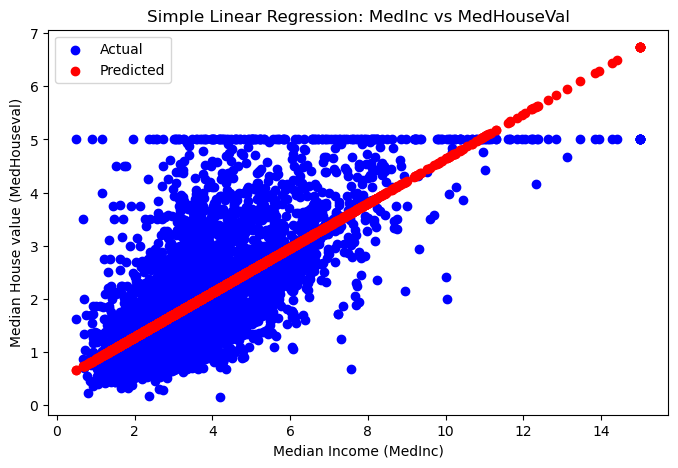

In [615]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test['MedInc'], y_test, color='blue', label='Actual')
plt.scatter(X_test['MedInc'], y_pred_simple, color='red', label='Predicted')
plt.xlabel("Median Income (MedInc)")
plt.ylabel("Median House value (MedHouseval)")
plt.title("Simple Linear Regression: MedInc vs MedHouseVal")
plt.legend()
plt.show()

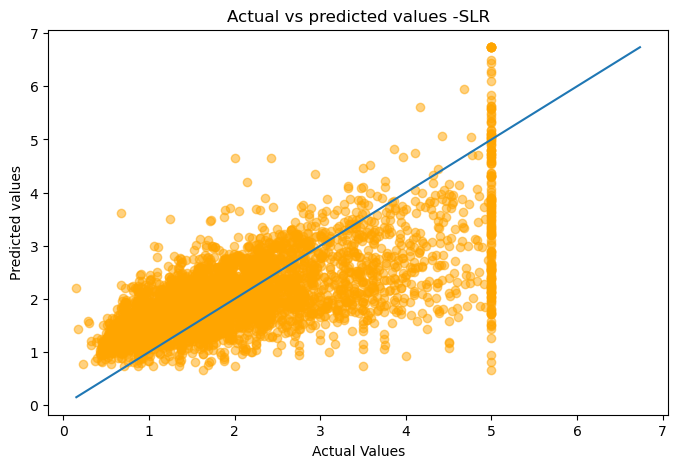

In [616]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_simple, alpha=0.5, color='orange')
plt.xlabel('Actual Values')
plt.ylabel("Predicted values")
plt.title("Actual vs predicted values -SLR")
min_val = min(y_test.min(), y_pred_simple.min())
max_val = max(y_test.max(), y_pred_simple.max())
plt.plot([min_val, max_val], [min_val, max_val])
plt.show()

Multple Linear Regression 

In [617]:
multiple_model = LinearRegression()
multiple_model.fit(X_train, y_train)

LinearRegression()

In [618]:
y_pred_multiple = multiple_model.predict(X_test)

In [619]:
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
mae_multiple = mean_absolute_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

In [620]:
print("\nMultiple Linear Regression (All Features) Results:")
print("MSE:", mse_multiple)
print("MAE:", mae_multiple)
print("R2 Score:", r2_multiple)


Multiple Linear Regression (All Features) Results:
MSE: 0.5558915986952442
MAE: 0.5332001304956556
R2 Score: 0.575787706032451


Visualization

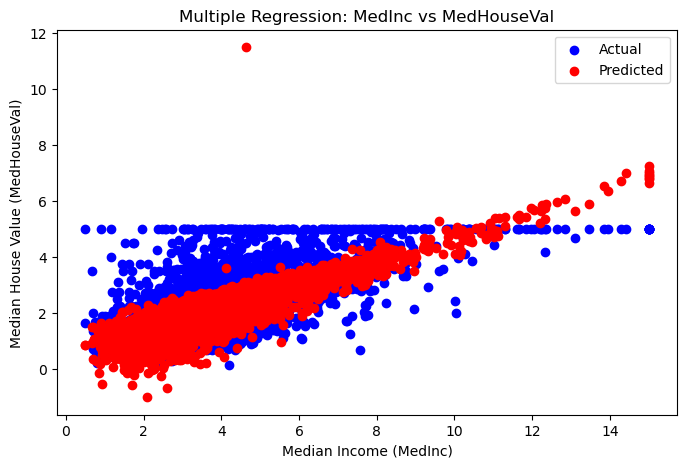

In [621]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test['MedInc'], y_test, color='blue', label='Actual')
plt.scatter(X_test['MedInc'], y_pred_multiple, color='red', label='Predicted')
plt.xlabel("Median Income (MedInc)")
plt.ylabel("Median House Value (MedHouseVal)")
plt.title("Multiple Regression: MedInc vs MedHouseVal")
plt.legend()
plt.show()

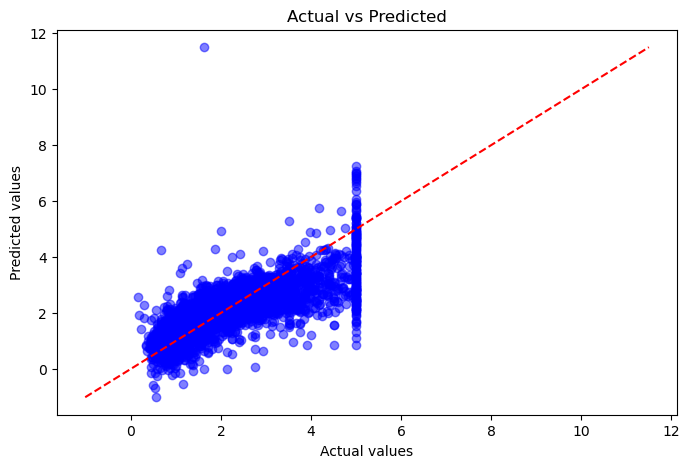

In [622]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_multiple, alpha=0.5, color='blue')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted")
# add a diagnol refrence line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.show()

Polynomial Regression 

In [623]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [624]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [625]:
print("Original feature count: ", X_train.shape[1])
print("After polynomial transformation: ", X_train_poly.shape[1])

Original feature count:  8
After polynomial transformation:  44


In [626]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [627]:
y_pred_poly = poly_model.predict(X_test_poly)

In [628]:
mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

In [629]:

print("\nPolynomial regression (degree=2) Results: ")
print("MSE: ", mse_poly)
print("MAE:", mae_poly)
print("R2 score", r2_poly)


Polynomial regression (degree=2) Results: 
MSE:  0.46430152351623943
MAE: 0.46700093333042214
R2 score 0.6456819731657208


Comparison

In [630]:
print("\nComparison: ")
print(f"Linear Regression R2: {r2:.4f}")
print(f"Polynomial Regression R2: {r2_poly:.4f}")


Comparison: 
Linear Regression R2: 0.5758
Polynomial Regression R2: 0.6457


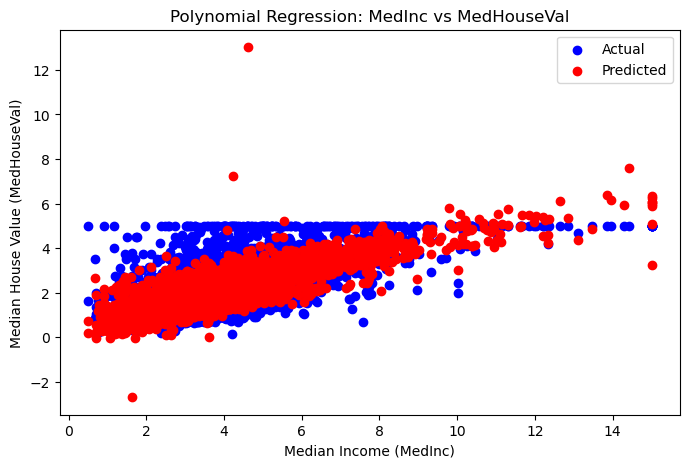

In [631]:
# Plot 1: Scatter with predictions (MedInc for visualization)
plt.figure(figsize=(8, 5))
plt.scatter(X_test['MedInc'], y_test, color='blue', label='Actual')
plt.scatter(X_test['MedInc'], y_pred_poly, color='red', label='Predicted')
plt.xlabel("Median Income (MedInc)")
plt.ylabel("Median House Value (MedHouseVal)")
plt.title("Polynomial Regression: MedInc vs MedHouseVal")
plt.legend()
plt.show()

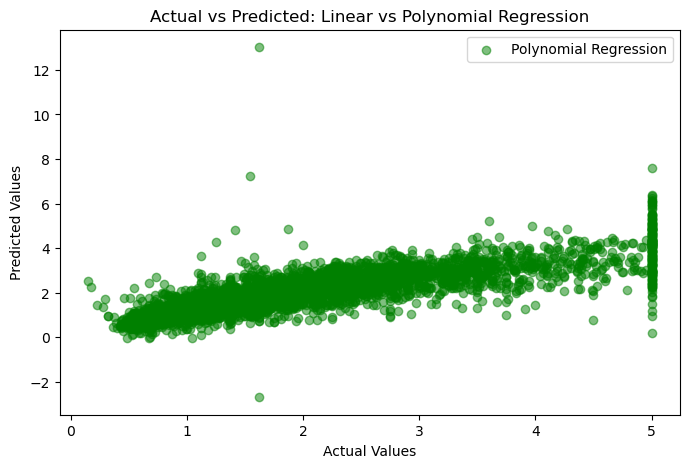

In [632]:
# plot actual vs predicted for both models
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_poly, alpha=0.5, color='green', label='Polynomial Regression')
min_val= min(y_test.min(), y_pred.min(), y_pred_poly.min())
max_val = max(y_test.max(), y_pred.max(), y_pred_poly.max())
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted: Linear vs Polynomial Regression")
plt.legend()
plt.show()

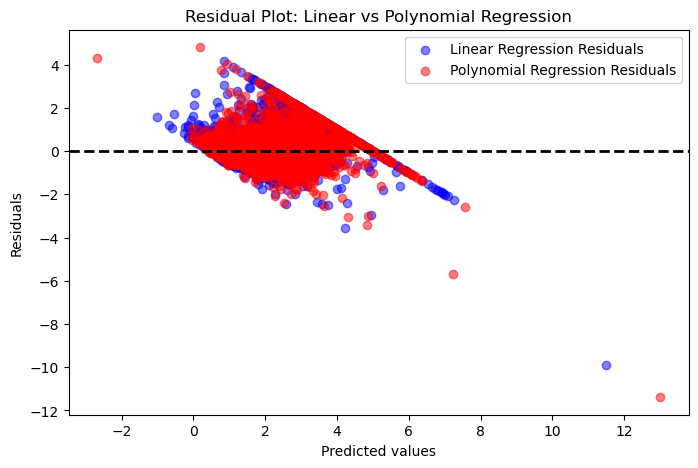

In [633]:
# residual plot to see error
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, y_test-y_pred, alpha=0.5, color='blue', label='Linear Regression Residuals')
plt.scatter(y_pred_poly, y_test-y_pred_poly, alpha=0.5, color='red', label='Polynomial Regression Residuals')
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title("Residual Plot: Linear vs Polynomial Regression")
plt.legend()
plt.show()

In [634]:
# Compare all models
print("\nModel Comparison:")
print(f"Simple LR - R2: {r2_simple:.4f}, MSE: {mse_simple:.4f}, MAE: {mae_simple:.4f}")
print(f"Multiple LR - R2: {r2_multiple:.4f}, MSE: {mse_multiple:.4f}, MAE: {mae_multiple:.4f}")
print(f"Polynomial (Deg 2) - R2: {r2_poly:.4f}, MSE: {mse_poly:.4f}, MAE: {mae_poly:.4f}")


Model Comparison:
Simple LR - R2: 0.4589, MSE: 0.7091, MAE: 0.6299
Multiple LR - R2: 0.5758, MSE: 0.5559, MAE: 0.5332
Polynomial (Deg 2) - R2: 0.6457, MSE: 0.4643, MAE: 0.4670
